In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **Import Dataset**

In [31]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/sic/ai4i2020.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd

df = pd.read_csv(file_path)
df.head(10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


# **Cek Nilai Dataset**

In [34]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [35]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

# **Preprocessing Data**

In [36]:

# Preprocessing - assuming 'Tool wear [min]' is the target variable
X = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']]
y = df['Tool wear [min]']

In [37]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Pelatihan Model Decision Tree Regressor**

In [39]:
# Train decision tree regressor model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=0)

# **Evaluasi Model**

Mean Squared Error (MSE): 6725.0840
R-squared (R2): -0.6970


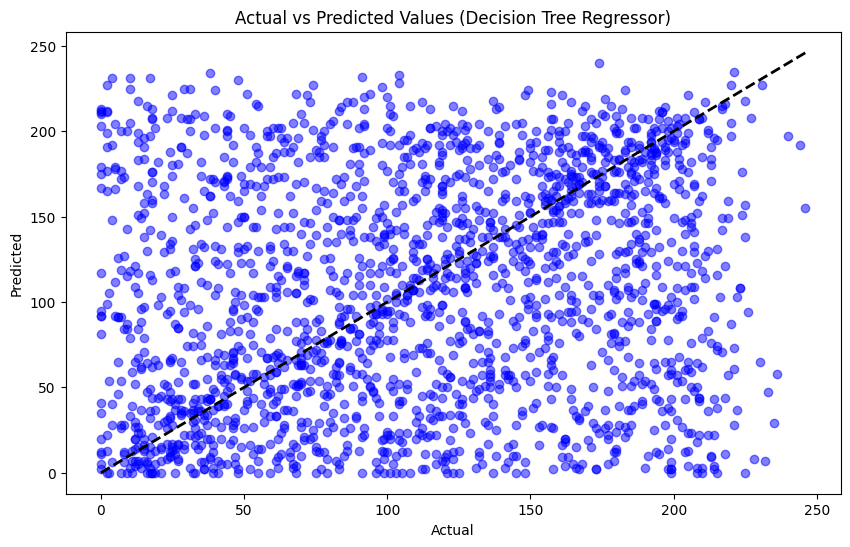

In [40]:
# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.show()


# **Prediksi Data**

In [41]:
# Example usage of the prediction function
def predict_tool_wear_decision_tree(input_data):
    # Normalize input data if necessary
    input_df = pd.DataFrame([input_data], columns=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'])
    input_scaled = scaler.transform(input_df)
    # Perform prediction
    prediction = model.predict(input_scaled)
    return prediction[0]
# List of new data points to test
new_data_points = [
    [600.0, 620.0, 1800, 90.0],  # Scenario 1: Higher values
    [150.5, 110.0, 1000, 40.0],  # Scenario 2 (sebelumnya)
    [280.0, 290.0, 1500, 50.0],  # Scenario 3 (sebelumnya)
    [120.3, 180.5, 1300, 55.5]   # Scenario 4: Moderate values
]

# Loop through each new data point and predict wear time
for i, data_point in enumerate(new_data_points, start=1):
    predicted_wear_time = predict_tool_wear_decision_tree(data_point)
    print(f"Scenario {i}: Predicted tool wear time: {predicted_wear_time:.2f} minutes")

Scenario 1: Predicted tool wear time: 5.00 minutes
Scenario 2: Predicted tool wear time: 192.00 minutes
Scenario 3: Predicted tool wear time: 178.00 minutes
Scenario 4: Predicted tool wear time: 192.00 minutes


In [42]:
# Example of maintenance scheduling based on predicted wear time
threshold = 30

# Loop through each new data point and predict wear time
for i, data_point in enumerate(new_data_points, start=1):
    # Predict wear time for the current scenario using Decision Tree Regressor
    predicted_wear_time = predict_tool_wear_decision_tree(data_point)

    # Example of maintenance scheduling based on predicted wear time
    if predicted_wear_time <= threshold:
       print(f"Scenario {i}: Recommended scheduled maintenance for the tool because predicted wear time is {predicted_wear_time:.2f} minutes.")
    else:
       print(f"Scenario {i}: No immediate maintenance recommended. Predicted wear time is {predicted_wear_time:.2f} minutes.")


Scenario 1: Recommended scheduled maintenance for the tool because predicted wear time is 5.00 minutes.
Scenario 2: No immediate maintenance recommended. Predicted wear time is 192.00 minutes.
Scenario 3: No immediate maintenance recommended. Predicted wear time is 178.00 minutes.
Scenario 4: No immediate maintenance recommended. Predicted wear time is 192.00 minutes.
